In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Conv2D,Conv2DTranspose,Flatten,Reshape,RepeatVector,LSTM
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist
import numpy as np
def m_img_show(imgs,n_c=None):
  img_n_c=  n_c or len(imgs)
  img_n_r=(len(imgs)-1)//n_c+1
  if imgs.shape[-1]==1:
    imgs=imgs.squeeze(axis=-1)
  plt.figure(figsize=(img_n_c,img_n_r))
  for idx,im in enumerate(imgs):
    plt.subplot(img_n_r,img_n_c,idx+1)
    plt.imshow(im,cmap='binary')
    plt.axis('off')

오토인코더


In [ ]:
(tr_x, tr_y), (tt_x, tt_y) = fashion_mnist.load_data()
tr_x = tr_x.astype(np.float32) / 255
tt_x = tt_x.astype(np.float32) / 255

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0942 - val_loss: 0.0683
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0646 - val_loss: 0.0620
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0620 - val_loss: 0.0615
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - val_loss: 0.0614
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - val_loss: 0.0614
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - val_loss: 0.0614
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - val_loss: 0.0614
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - val_loss: 0.0615
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0618 - val_loss: 0.0615
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.061

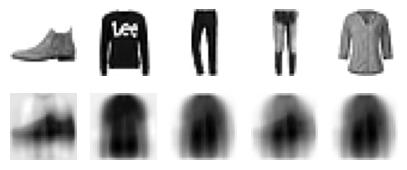

In [7]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

ec = Sequential([
    Flatten(),
    Dense(2, activation="relu"),
])
dec = Sequential([
    Dense(28 * 28),
    Reshape([28, 28]),
])
ae = Sequential([ec, dec])

ae.compile(loss="mse", optimizer="adam")
hy = ae.fit(tr_x, tr_x, epochs=20,validation_data=(tt_x, tt_x))
g_img=ae.predict(tt_x[:5])
ck_img=np.concatenate([tt_x[:5],g_img],axis=0)
m_img_show(ck_img,5)
plt.show()

Epoch 1/20
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0556 - val_loss: 0.0493
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0485 - val_loss: 0.0476
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0470 - val_loss: 0.0467
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0463 - val_loss: 0.0459
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0456 - val_loss: 0.0457
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0447 - val_loss: 0.0444
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0472 - val_loss: 0.0440
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0438 - val_loss: 0.0471
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0440 - val_loss: 0.0425
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.04

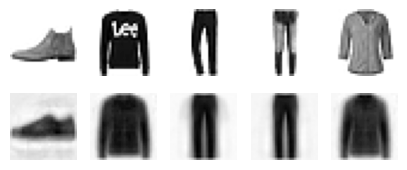

In [8]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

ec = Sequential([
    Flatten(),
    Dense(100, activation="relu"),
    Dense(30, activation="relu"),
    Dense(2, activation="relu"),
])
dec = Sequential([
    Dense(30, activation="relu"),
    Dense(100, activation="relu"),
    Dense(28 * 28),
    Reshape([28, 28]),
])
ae = Sequential([ec, dec])

ae.compile(loss="mse", optimizer="adam")
hy = ae.fit(tr_x, tr_x, epochs=20,validation_data=(tt_x, tt_x))
g_img=ae.predict(tt_x[:5])
ck_img=np.concatenate([tt_x[:5],g_img],axis=0)
m_img_show(ck_img,5)
plt.show()

합성곱 오토인코더

Epoch 1/20
1875/1875 [==============================] - 24s 6ms/step - loss: 0.0136 - val_loss: 0.0068
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

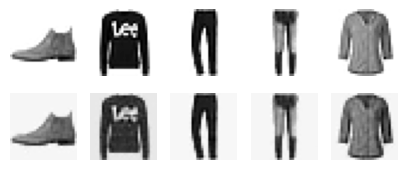

In [4]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

ec = Sequential([
    Reshape([28, 28, 1]),
    Conv2D(16, 3,2, padding="same", activation="relu"),# 출력: 14 × 14 x 16
    Conv2D(32, 3,2, padding="same", activation="relu"),# 출력: 7 × 7 x 32
    Conv2D(64, 3,2, padding="same", activation="relu"),# 출력: 3 × 3 x 64
    Flatten()
])
dec = Sequential([
    Dense(3 * 3 * 64),
    Reshape((3, 3, 64)),
    Conv2DTranspose(32, 3, 2, activation="relu"),
    Conv2DTranspose(16, 3, 2, padding="same",activation="relu"),
    Conv2DTranspose(1, 3, 2, padding="same"),
    Reshape([28, 28])
])
ae = Sequential([ec, dec])

ae.compile(loss="mse", optimizer="adam")
hy = ae.fit(tr_x, tr_x, epochs=20,validation_data=(tt_x, tt_x))
g_img=ae.predict(tt_x[:5])
ck_img=np.concatenate([tt_x[:5],g_img],axis=0)
m_img_show(ck_img,5)
plt.show()

Epoch 1/20
1875/1875 [==============================] - 33s 12ms/step - loss: 0.0263 - val_loss: 0.0190
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0174 - val_loss: 0.0160
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0153 - val_loss: 0.0146
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0139 - val_loss: 0.0136
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0130 - val_loss: 0.0129
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0118 - val_loss: 0.0117
Epoch 8/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 9/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 10/20
1875/1875 [==============================] - 20s 11m

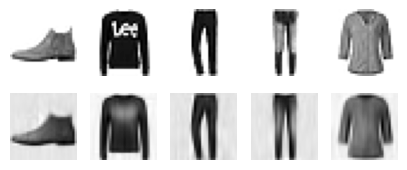

In [6]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

ec = Sequential([
    LSTM(100, return_sequences=True),
    LSTM(30)
])
dec = Sequential([
    RepeatVector(28),
    LSTM(100, return_sequences=True),
    Dense(28)
])
ae = Sequential([ec, dec])

ae.compile(loss="mse", optimizer="adam")
hy = ae.fit(tr_x, tr_x, epochs=20,validation_data=(tt_x, tt_x))
g_img=ae.predict(tt_x[:5])
ck_img=np.concatenate([tt_x[:5],g_img],axis=0)
m_img_show(ck_img,5)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Conv2D,Conv2DTranspose,Flatten,Reshape,RepeatVector,LSTM
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist,mnist
import numpy as np

In [10]:
(tr_x, tr_y), (tt_x, tt_y) = mnist.load_data()
tr_x1 = tr_x.astype(np.float32) / 255
tt_x1 = tt_x.astype(np.float32) / 255

In [9]:
(tr_x, tr_y), (tt_x, tt_y) = fashion_mnist.load_data()
tr_x = tr_x.astype(np.float32) / 255
tt_x = tt_x.astype(np.float32) / 255

In [21]:
ck_x=tt_x[:100]#입력 데이터(원본)
ck_x1=tt_x1[:100]#입력 데이터(거짓)
ck_y=np.array([[1]]*100)#정답<판별내용>(참)
ck_y1=np.array([[0]]*100)#정답<판별내용>(거짓)

In [22]:
ck_y1.shape

(100, 1)

In [23]:
ck_tr_x=np.concatenate([ck_x,ck_x1],axis=0)
ck_tr_y=np.concatenate([ck_y,ck_y1],axis=0)

In [25]:
ck_tr_x.shape,ck_tr_y.shape

((200, 28, 28), (200, 1))

GAN

판별자

In [55]:
di_m = Sequential([
    Flatten(),#입력
    Dense(200,activation='relu'),#은닉
    Dense(100,activation='relu'),
    Dense(1,activation='sigmoid'),#출력
])

생성자

In [56]:
g_m = Sequential([
    Dense(100,activation='relu'),
    Dense(200,activation='relu'),
    Dense(28*28,activation='relu'),
    Reshape([28,28]),
])

통합

In [57]:
gan_m=Sequential([g_m,di_m])

학습

In [80]:
#1.판별자
di_m.compile(loss='binary_crossentropy',metrics='acc')
#2.생성자
di_m.trainable=False
gan_m.compile(loss='binary_crossentropy')

In [73]:
ep=10
bc_size=32
c_size=100

In [77]:
(tr_x, tr_y), (tt_x, tt_y) = fashion_mnist.load_data()
tr_x = tr_x.astype(np.float32) / 255
tt_x = tt_x.astype(np.float32) / 255
dataset=tf.data.Dataset.from_tensor_slices(tr_x).shuffle(1000)
dataset=dataset.batch(bc_size,drop_remainder=True).prefetch(1)

In [ ]:
for i in range(1,ep+1):
  for re_img in dataset:
    #1.판별자 학습
    re_y=np.array([[0.]]*32)

    z=np.random.normal(0,1,(bc_size,c_size))
    g_img=g_m(z)
    g_y=np.array([[0.]]*32)
    re_loss = di_m.train_on_batch(re_img,re_y)#정답공부
    g_loss = di_m.train_on_batch(g_img,g_y)#오답공부
    all_loss = (re_loss+g_loss)*0.5
    D_loss,D_acc=all_loss

    #2.생성자 학습
    z=np.random.normal(0,1,(bc_size,c_size))
    g_y=np.array([[1.]]*32)
    G_loss=gan_m.train_on_batch(z,g_y)


In [71]:
idx=np.random.randint(0,60000,32)
re_img=tr_x[idx]
re_y=np.array([[1.]]*32)
re_img.shape,re_y.shape

((32, 28, 28), (32, 1))

In [63]:
z=np.random.normal(0,1,(32,100))
z.shape

(32, 100)

In [70]:
g_img=g_m(z).numpy()
g_y=np.array([[0.]]*32)
g_img.shape,g_y.shape

((32, 28, 28), (32, 1))

In [ ]:
re_loss = di_m.train_on_batch(re_img,re_y)#정답공부
g_loss = di_m.train_on_batch(g_img,g_y)#오답공부
all_loss = (re_loss+g_loss)*0.5

DCGAN

CGAN